### Importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import numpy as np
from datetime import datetime as dt

In [4]:
df = pd.read_csv('NY_CitiBike_data.csv', index_col = 0)

In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [8]:
df.drop(columns = {'_merge'}, inplace = True)

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,2022-08-26,27.4
1,48A796B4996BACB0,electric_bike,2022-08-03 12:56:29,2022-08-03 13:06:10,21 St & 4 Ave,3668.04,Degraw St & Smith St,4298.05,40.662584,-73.995554,40.682915,-73.993182,member,2022-08-03,27.6
2,AE459F435C0B1D5B,classic_bike,2022-08-11 17:49:47,2022-08-11 18:05:08,48 St & Barnett Ave,6358.05,Queens Plaza North & Crescent St,6429.01,40.750016,-73.915409,40.751102,-73.940737,member,2022-08-11,26.6
3,CA8B4A94620E74C0,electric_bike,2022-08-10 17:25:41,2022-08-10 17:35:23,7 Ave & Central Park South,6912.01,8 Ave & W 33 St,6450.12,40.766741,-73.979069,40.751551,-73.993934,member,2022-08-10,27.2
4,EB85C6F0148BC348,classic_bike,2022-08-31 13:47:12,2022-08-31 14:24:00,Jerome Ave & W 195 St,8653.09,Sherman Ave & E 166 St,8072.06,40.868858,-73.896500,40.831305,-73.917448,member,2022-08-31,25.6


In [10]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Basic plotting with pandas

In [14]:
df_temp = df.set_index('date')

In [15]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-08-26,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,27.4
2022-08-03,48A796B4996BACB0,electric_bike,2022-08-03 12:56:29,2022-08-03 13:06:10,21 St & 4 Ave,3668.04,Degraw St & Smith St,4298.05,40.662584,-73.995554,40.682915,-73.993182,member,27.6
2022-08-11,AE459F435C0B1D5B,classic_bike,2022-08-11 17:49:47,2022-08-11 18:05:08,48 St & Barnett Ave,6358.05,Queens Plaza North & Crescent St,6429.01,40.750016,-73.915409,40.751102,-73.940737,member,26.6
2022-08-10,CA8B4A94620E74C0,electric_bike,2022-08-10 17:25:41,2022-08-10 17:35:23,7 Ave & Central Park South,6912.01,8 Ave & W 33 St,6450.12,40.766741,-73.979069,40.751551,-73.993934,member,27.2
2022-08-31,EB85C6F0148BC348,classic_bike,2022-08-31 13:47:12,2022-08-31 14:24:00,Jerome Ave & W 195 St,8653.09,Sherman Ave & E 166 St,8072.06,40.868858,-73.896500,40.831305,-73.917448,member,25.6


<Axes: xlabel='date'>

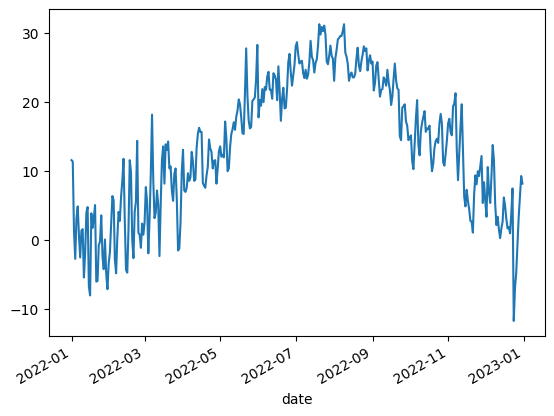

In [16]:
df_temp['avgTemp'].plot()

The graph shows the average temperature throughout the year 2022. It can be seen that the temperature starts cold in January and increases to a high in July before decreasing again in December.

### Procedural approach

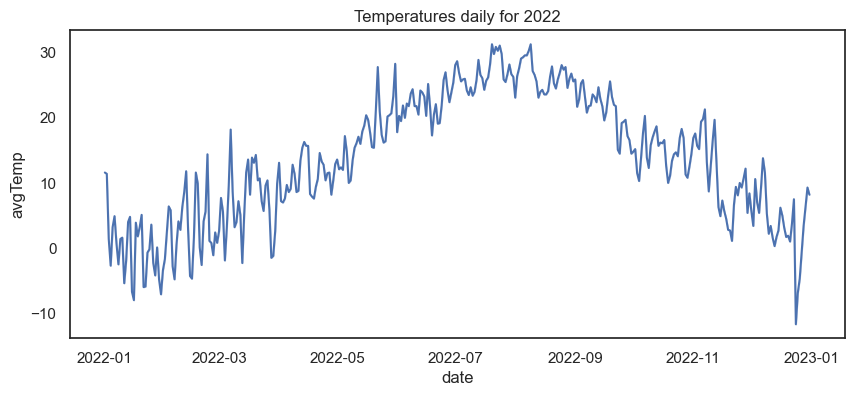

In [27]:
sns.set(style="white")
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp')
plt.show()

The graph shows daily temperatures in New York for 2022.

### Aggregate trips 

In [31]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [33]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [34]:
df_group.head()

,date,ride_id
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [35]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          30689921
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of January 1st is (20895, 17)
Shape of January 2nd is (44234, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [39]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-08-26,DF208007EE5F9D79,classic_bike,2022-08-26 15:21:44,2022-08-26 15:34:20,Berkeley Pl & 6 Ave,4134.06,Windsor Pl & 8 Ave,3620.02,40.676530,-73.978469,40.660906,-73.983074,member,27.4,111955,both
2022-08-26,4BF322F1E0D74152,classic_bike,2022-08-26 16:08:53,2022-08-26 16:17:48,W 44 St & 11 Ave,6756.05,8 Ave & W 33 St,6450.12,40.762009,-73.996975,40.751551,-73.993934,member,27.4,111955,both
2022-08-26,301E3D811B0D5219,classic_bike,2022-08-26 02:34:33,2022-08-26 08:29:41,9 Ave & W 45 St,6717.06,8 Ave & W 33 St,6450.12,40.760193,-73.991255,40.751551,-73.993934,member,27.4,111955,both
2022-08-26,7D4E20D0A43FCE1F,classic_bike,2022-08-26 11:25:26,2022-08-26 11:52:19,Central Ave & Covert St,4550.05,DeKalb Ave & Hudson Ave,4513.06,40.689290,-73.909510,40.689888,-73.981013,casual,27.4,111955,both
2022-08-26,BB560C341D35EB7D,electric_bike,2022-08-26 19:46:08,2022-08-26 19:48:11,21 St & 43 Ave,6395.01,9 St & 44 Rd,6361.03,40.750525,-73.945948,40.749660,-73.952100,member,27.4,111955,both


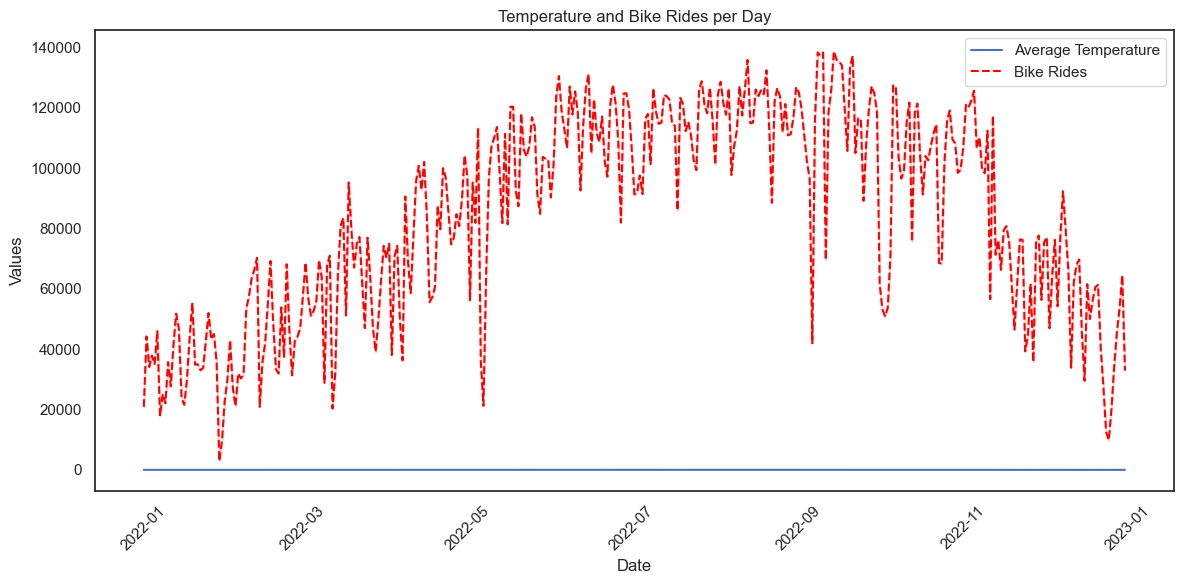

In [45]:
sns.set(style="white")
plt.figure(figsize=(12, 6))
# Plotting temperature data
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', label='Average Temperature', errorbar=None)

# Plotting bike rides data
sns.lineplot(data=df_temp, x=df_temp.index, y='bike_rides_daily', label='Bike Rides', color='red', linestyle='--')

plt.title('Temperature and Bike Rides per Day')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

Merged(count of trips per day and weather dataframe) dataframe displaying temperature per trip. It's clear there's a problem: the temperature line appears flat because the scales of the two variables are different, making the temperature fluctuations negligible compared to the bike trips. To solve this, we will use—subplots.

#### Final dual axis plot

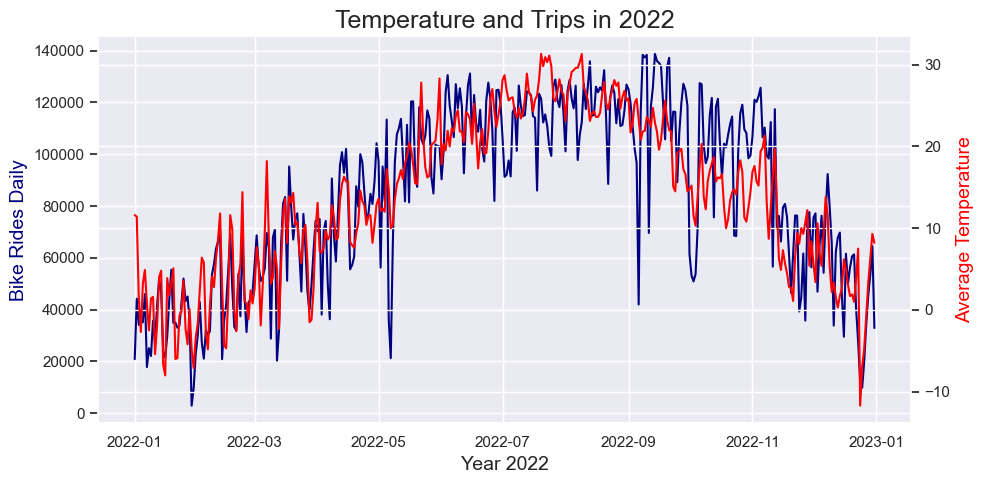

In [53]:
# Set Seaborn style
sns.set(style="darkgrid")

# Create figure and axis objects with subplots()
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting bike rides data
sns.lineplot(data=df_temp, x=df_temp.index, y='bike_rides_daily', ax=ax1, color="navy", errorbar=None)
ax1.set_xlabel("Year 2022", fontsize=14)
ax1.set_ylabel("Bike Rides Daily", color="navy", fontsize=14)

# Create a twin axis for the temperature plot
ax2 = ax1.twinx()

# Plotting temperature data
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', ax=ax2, color="red", errorbar=None)
ax2.set_ylabel("Average Temperature", color="red", fontsize=14)

# Set the title
plt.title('Temperature and Trips in 2022', fontsize=18)

# Adjust x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

The graph above shows final line chart with dual axes. The red line represents the average temperatures in New York in 2022, and the blue line represents the number of trips taken during the year.

I used Matplotlib to create a dual-axis plot, effectively visualizing two different datasets on the same plot.It starts by creating a figure and primary axis object,specifying the figure size. The bike rides data from the DataFrame df_temp is then plotted on the primary y-axis, with the x-axis labeled "Year 2022" and the y-axis labeled "Bike rides daily. To visualize a second dataset with a different y-axis scale, a secondary y-axis is created with ax2 = ax.twinx(), which shares the same x-axis as ax. The average temperature data is plotted on this secondary y-axis, and is labeled "Average temperatures".
The paradigm used here is the Object-Oriented Programming (OOP) interface of Matplotlib, which mimics human perspective by treating elements as objects with specific traits and functions. It constructs code by assigning properties and behaviors to these objects, providing greater control and flexibility, especially for creating complex plots with multiple subplots or axes

In [97]:
plt.style.use('ggplot')

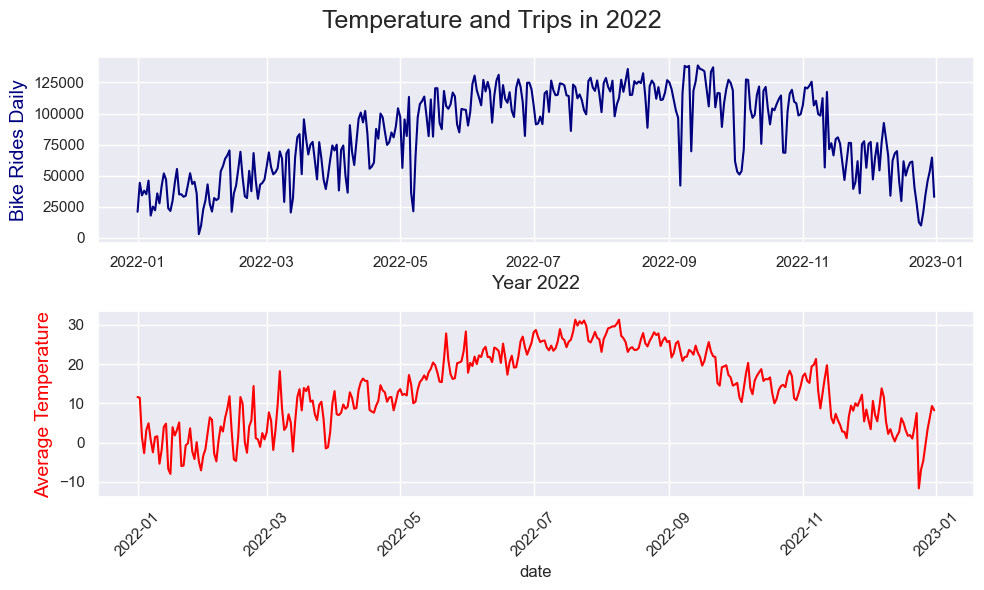

In [57]:
# Set Seaborn style
sns.set(style="darkgrid")

# Create figure and axis objects with subplots()
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))

# Plotting bike rides data
sns.lineplot(data=df_temp, x=df_temp.index, y='bike_rides_daily', ax=ax1, color="navy", errorbar=None)
ax1.set_ylabel("Bike Rides Daily", color="navy", fontsize=14)
ax1.set_xlabel("Year 2022", fontsize=14)

# Plotting temperature data
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', ax=ax2, color="red", errorbar=None)
ax2.set_ylabel("Average Temperature", color="red", fontsize=14)

# Set the title for the figure
plt.suptitle('Temperature and Trips in 2022', fontsize=18)

# Adjust x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

The top graph shows the number of bike rides made daily, while the second graph shows the average temperature throughout the year 2022. There is a correlation between the two lines, with ridership increasing as the temperature rises.

In [60]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')